In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas
Iris = load_iris()
print(dir(Iris))

Data = pandas.DataFrame(Iris.data,columns=Iris.feature_names)
Data['Target'] = Iris.target
Data['Target_Name'] = Data.Target.apply(lambda x : Iris.target_names[x])
Data.head()

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Target_Name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [5]:
Input = Data[['petal length (cm)','petal width (cm)']]
cluster = KMeans(n_clusters=3)
Predict = cluster.fit_predict(Input)
Predict
 

C:\Users\Shree\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
Data['cluster'] = Predict
Data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Target_Name,cluster
0,5.1,3.5,1.4,0.2,0,setosa,0
1,4.9,3.0,1.4,0.2,0,setosa,0
2,4.7,3.2,1.3,0.2,0,setosa,0
3,4.6,3.1,1.5,0.2,0,setosa,0
4,5.0,3.6,1.4,0.2,0,setosa,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,1
146,6.3,2.5,5.0,1.9,2,virginica,1
147,6.5,3.0,5.2,2.0,2,virginica,1
148,6.2,3.4,5.4,2.3,2,virginica,1


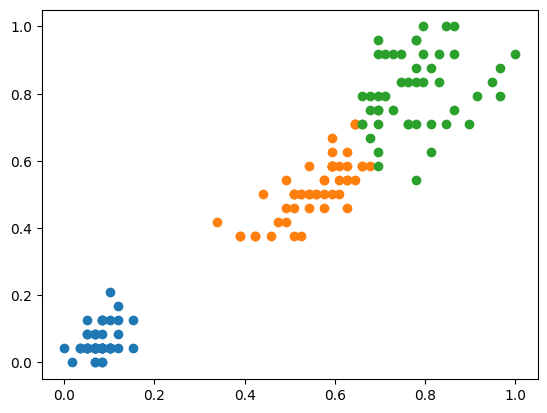

In [31]:
import matplotlib.pyplot as plt
Data1 = Data[Data.cluster == 0]
Data2 = Data[Data.cluster == 1]
Data3 = Data[Data.cluster == 2]

plt.scatter(Data1['petal length (cm)'],Data1['petal width (cm)'])
plt.scatter(Data3['petal length (cm)'],Data3['petal width (cm)'])
plt.scatter(Data2['petal length (cm)'],Data2['petal width (cm)'])


In [15]:
from sklearn.preprocessing import MinMaxScaler

Scale = MinMaxScaler()
Scale.fit(Data[['petal length (cm)']])
Data['petal length (cm)'] = Scale.transform(Data[['petal length (cm)']])

Scale.fit(Data[['petal width (cm)']])
Data['petal width (cm)'] = Scale.transform(Data[['petal width (cm)']])
Data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Target_Name,cluster
0,5.1,3.5,0.067797,0.041667,0,setosa,0
1,4.9,3.0,0.067797,0.041667,0,setosa,0
2,4.7,3.2,0.050847,0.041667,0,setosa,0
3,4.6,3.1,0.084746,0.041667,0,setosa,0
4,5.0,3.6,0.067797,0.041667,0,setosa,0
...,...,...,...,...,...,...,...
145,6.7,3.0,0.711864,0.916667,2,virginica,1
146,6.3,2.5,0.677966,0.750000,2,virginica,1
147,6.5,3.0,0.711864,0.791667,2,virginica,1
148,6.2,3.4,0.745763,0.916667,2,virginica,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


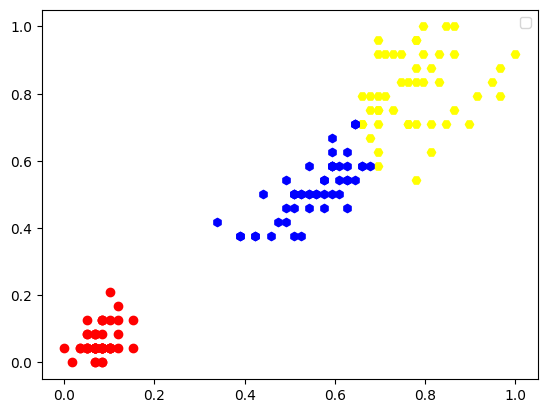

In [37]:
Data4 = Data[Data.cluster == 0]
Data5 = Data[Data.cluster == 1]
Data6 = Data[Data.cluster == 2]

plt.scatter(Data4['petal length (cm)'],Data4['petal width (cm)'],color='red',marker='o')
plt.scatter(Data5['petal length (cm)'],Data5['petal width (cm)'],color='yellow',marker='H')
plt.scatter(Data6['petal length (cm)'],Data6['petal width (cm)'],color='blue',marker='h')
plt.legend()
plt.show()

In [24]:
sse =[]
K_range = range(1,11)
for i in K_range:
    cluster = KMeans(n_clusters=i)
    cluster.fit(Input)
    sse.append(cluster.inertia_)

C:\Users\Shree\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Shree\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Shree\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

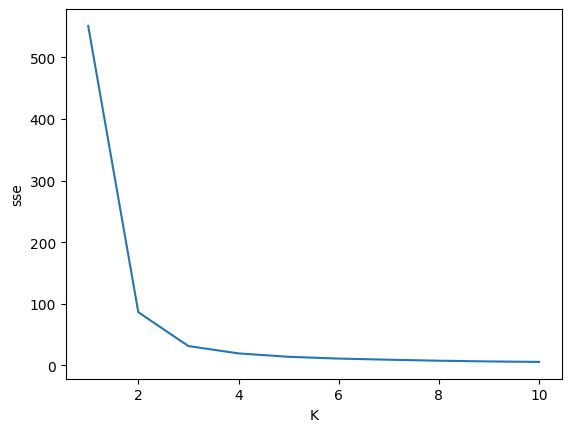

In [26]:
plt.plot(K_range,sse)
plt.xlabel('K')
plt.ylabel('sse')
plt.show()